In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy import stats

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)


# !pip install missingno
import missingno as msno

In [2]:
missing_values = ["n/a", "na", "-/-","-","[]",""]

In [3]:
df_origin = pd.read_csv("clean_scout.csv",na_values=missing_values)
df = df_origin.copy()
df

,make_model,short_description,body_type,price,vat,km,prev_owner,Type,Previous Owners,next_inspection,inspection_new,Warranty,full_service,non_smoking_vehicle,body_color,paint_type,body_color_orig,number_of_doors,number_of_seats,gearing_type,Cylinders,drive_chain,Fuel,co2_emission,emission_class,comfort_convenience,entertainment_media,Extras,safety_security,description,emission_label,Gears,age,hp_kw,Type_,warranty_month,upholstery_type,upholstery_color,displacement_cc,weight_kg,Consumption_comb,Consumption_city,Consumption_country
0,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770.000,VAT deductible,56013.000,2.000,"Used,,Diesel (Particulate Filter)",2,"06/2021,99 g CO2/km (comb)","Yes,Euro 6",4 (Green),NaN,NaN,Black,Metallic,Mythosschwarz,5.000,5.000,Automatic,3.000,front,Diesel,99.000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...","Sicherheit:, ,Deaktivierung für Beifahrer-Airb...",NaN,NaN,3.000,66.000,Used,NaN,Cloth,Black,1422.000,1220.000,3.800,3.500,3.500
1,Audi A1,1.8 TFSI sport,Sedans,14500.000,Price negotiable,80000.000,NaN,"Used,,Gasoline",NaN,NaN,NaN,NaN,NaN,NaN,Red,NaN,NaN,3.000,4.000,Automatic,4.000,front,Benzine,129.000,Euro 6,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",Langstreckenfahrzeug daher die hohe Kilometerl...,4 (Green),7.000,2.000,141.000,Used,NaN,Cloth,Grey,1798.000,1255.000,5.600,4.700,4.700
2,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640.000,VAT deductible,83450.000,1.000,"Used,,Diesel (Particulate Filter)",1,NaN,NaN,99 g CO2/km (comb),NaN,NaN,Black,Metallic,mythosschwarz metallic,4.000,4.000,Automatic,NaN,front,Diesel,99.000,Euro 6,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...","Fahrzeug-Nummer: AM-95365, ,Ehem. UPE 24.640 E...",4 (Green),NaN,3.000,85.000,Used,NaN,Cloth,Black,1598.000,NaN,3.800,3.400,3.400
3,Audi A1,1.4 TDi Design S tronic,Sedans,14500.000,NaN,73000.000,1.000,"Used,,Diesel (Particulate Filter)",1,NaN,NaN,NaN,99 g CO2/km (comb),Euro 6,Brown,Metallic,NaN,3.000,4.000,Automatic,3.000,NaN,Diesel,99.000,Euro 6,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...","Audi A1: ,- 1e eigenaar ,- Perfecte staat: sch...",NaN,6.000,3.000,66.000,Used,NaN,NaN,NaN,1422.000,1195.000,3.800,3.500,3.500
4,Audi A1,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,Sedans,16790.000,NaN,16200.000,1.000,"Used,,Diesel (Particulate Filter)",1,NaN,"Yes,109 g CO2/km (comb)",Euro 6,4 (Green),NaN,Black,Metallic,Mythosschwarz Metallic,5.000,5.000,Automatic,3.000,front,Diesel,109.000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...","Technik & Sicherheit:,Xenon plus,Klimaautomati...",NaN,NaN,3.000,66.000,Used,NaN,Cloth,Black,1422.000,NaN,4.100,3.800,3.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,Renault Espace,Blue dCi 200CV EDC Executive 4Control,Van,39950.000,VAT deductible,NaN,NaN,"New,,Diesel (Particulate Filter)",NaN,NaN,NaN,24 months,NaN,NaN,Grey,Metallic,Grigio scuro,5.000,5.000,Automatic,4.000,front,Diesel,139.000,NaN,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r...",

In [4]:
df.shape

(15919, 43)

In [5]:
# degiskenlerdeki eksik deger sayisi
df.isnull().sum()

make_model                 0
short_description         46
body_type                 60
price                      0
vat                     4513
km                      1024
prev_owner              6828
Type                       2
Previous Owners         6640
next_inspection        12384
inspection_new         11987
Warranty                6763
full_service            9689
non_smoking_vehicle    12459
body_color               597
paint_type              5772
body_color_orig         3774
number_of_doors          212
number_of_seats          977
gearing_type               0
Cylinders               5680
drive_chain             6858
Fuel                       0
co2_emission            2436
emission_class          3628
comfort_convenience      920
entertainment_media     1374
Extras                  2962
safety_security          982
description              668
emission_label         11974
Gears                   4712
age                     1597
hp_kw                     88
Type_         

In [6]:
# veri setindeki toplam eksik deger sayisi
df.isnull().sum().sum()

162822

In [7]:
# Azalan şekilde sıralamak
df.isnull().sum().sort_values(ascending=False)

non_smoking_vehicle    12459
next_inspection        12384
inspection_new         11987
emission_label         11974
warranty_month         11066
full_service            9689
weight_kg               6974
drive_chain             6858
prev_owner              6828
Warranty                6763
Previous Owners         6640
paint_type              5772
Cylinders               5680
upholstery_color        5022
upholstery_type         4871
Gears                   4712
vat                     4513
body_color_orig         3774
emission_class          3628
Extras                  2962
co2_emission            2436
Consumption_city        2376
Consumption_country     2376
Consumption_comb        2033
age                     1597
entertainment_media     1374
km                      1024
safety_security          982
number_of_seats          977
comfort_convenience      920
description              668
body_color               597
displacement_cc          496
number_of_doors          212
hp_kw         

In [8]:
## df.drop_duplicates()

In [9]:
def summary(dataframe,col_name):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(dropna=False),
           "oran" : (dataframe[col_name].value_counts(normalize=True,dropna=False) * 100)}))
    print("########################################")
    

In [10]:
na_cols = [col for col in df.columns if df[col].isnull().sum() > 0]
na_cols

['short_description',
 'body_type',
 'vat',
 'km',
 'prev_owner',
 'Type',
 'Previous Owners',
 'next_inspection',
 'inspection_new',
 'Warranty',
 'full_service',
 'non_smoking_vehicle',
 'body_color',
 'paint_type',
 'body_color_orig',
 'number_of_doors',
 'number_of_seats',
 'Cylinders',
 'drive_chain',
 'co2_emission',
 'emission_class',
 'comfort_convenience',
 'entertainment_media',
 'Extras',
 'safety_security',
 'description',
 'emission_label',
 'Gears',
 'age',
 'hp_kw',
 'Type_',
 'warranty_month',
 'upholstery_type',
 'upholstery_color',
 'displacement_cc',
 'weight_kg',
 'Consumption_comb',
 'Consumption_city',
 'Consumption_country']

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   short_description    15873 non-null  object 
 2   body_type            15859 non-null  object 
 3   price                15919 non-null  float64
 4   vat                  11406 non-null  object 
 5   km                   14895 non-null  float64
 6   prev_owner           9091 non-null   float64
 7   Type                 15917 non-null  object 
 8   Previous Owners      9279 non-null   object 
 9   next_inspection      3535 non-null   object 
 10  inspection_new       3932 non-null   object 
 11  Warranty             9156 non-null   object 
 12  full_service         6230 non-null   object 
 13  non_smoking_vehicle  3460 non-null   object 
 14  body_color           15322 non-null  object 
 15  paint_type           10147 non-null 

In [12]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns

In [13]:
missing_values_table(df)

                     n_miss  ratio
non_smoking_vehicle   12459 78.260
next_inspection       12384 77.790
inspection_new        11987 75.300
emission_label        11974 75.220
warranty_month        11066 69.510
full_service           9689 60.860
weight_kg              6974 43.810
drive_chain            6858 43.080
prev_owner             6828 42.890
Warranty               6763 42.480
Previous Owners        6640 41.710
paint_type             5772 36.260
Cylinders              5680 35.680
upholstery_color       5022 31.550
upholstery_type        4871 30.600
Gears                  4712 29.600
vat                    4513 28.350
body_color_orig        3774 23.710
emission_class         3628 22.790
Extras                 2962 18.610
co2_emission           2436 15.300
Consumption_city       2376 14.930
Consumption_country    2376 14.930
Consumption_comb       2033 12.770
age                    1597 10.030
entertainment_media    1374  8.630
km                     1024  6.430
safety_security     

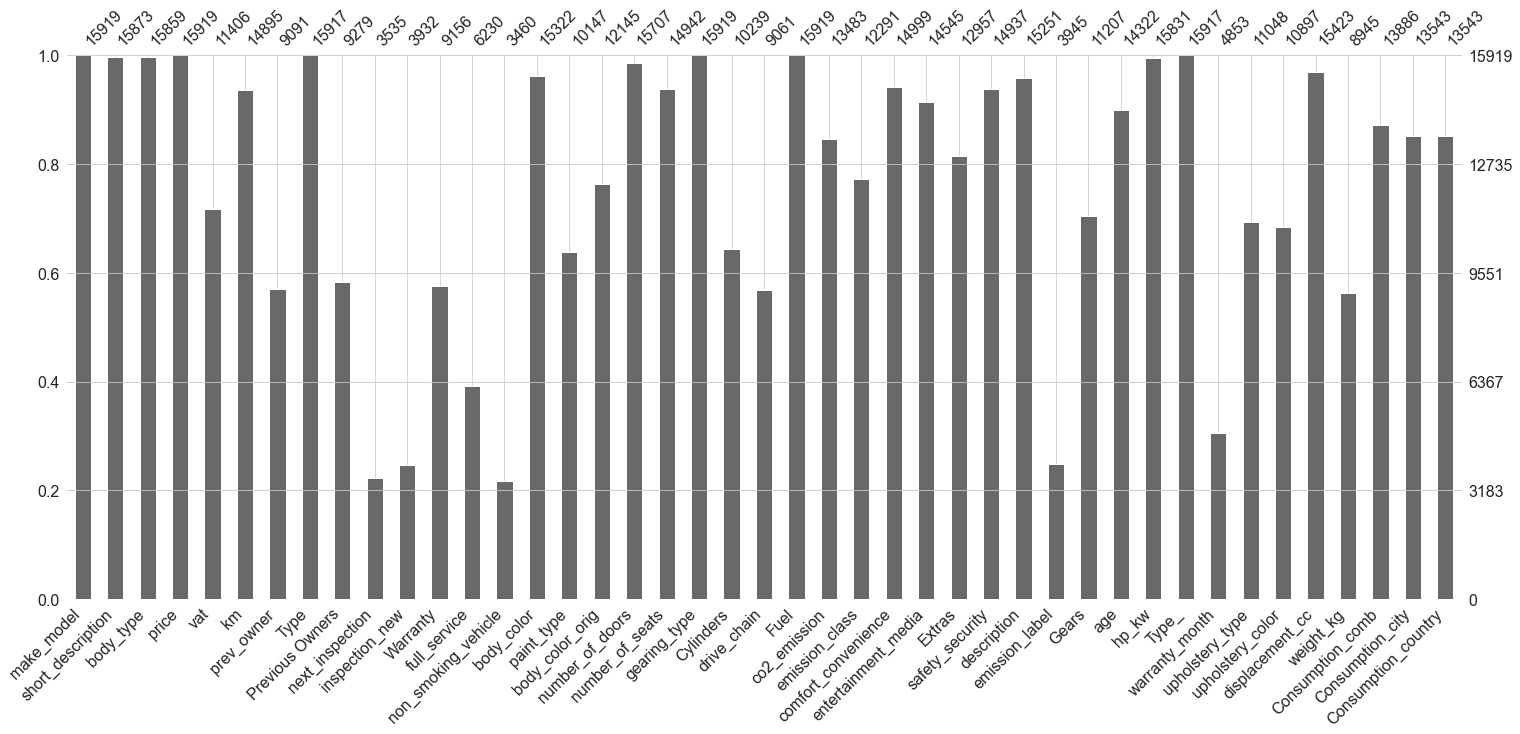

In [14]:
msno.bar(df);                          ## hangi sütunda tam değer ne kadar bunu verir ? 

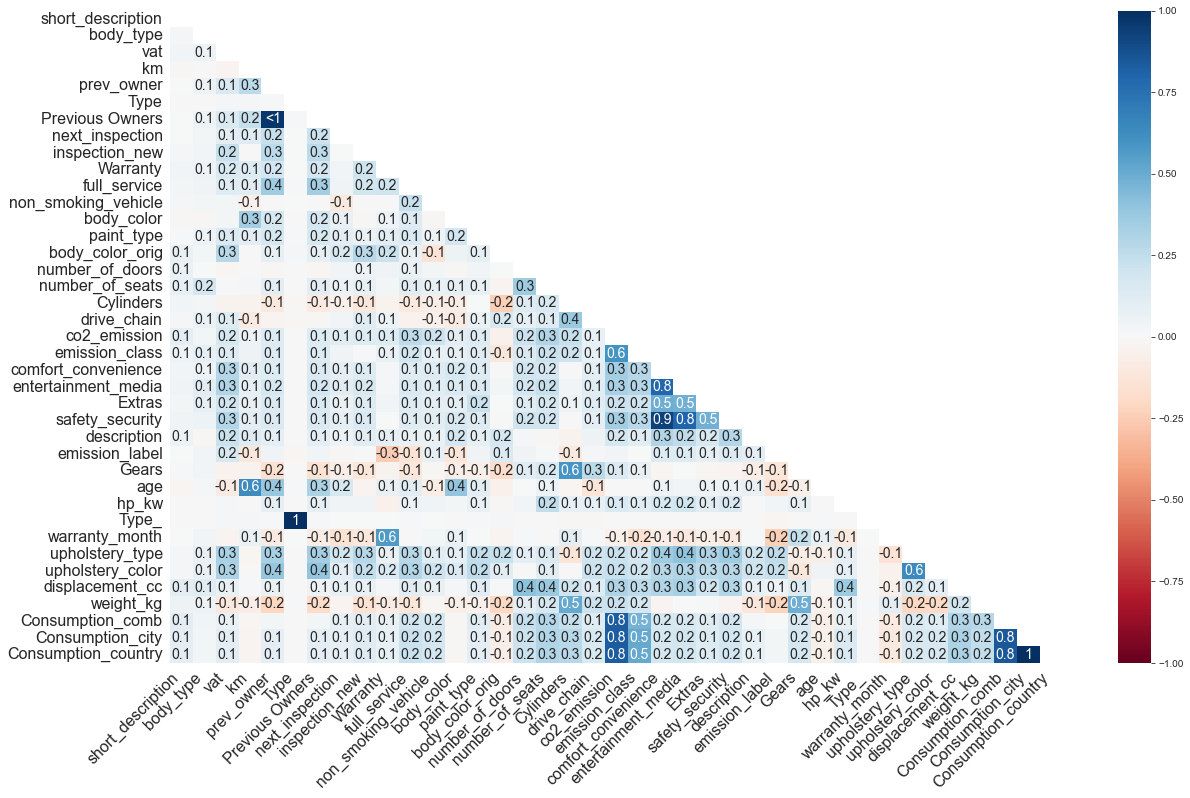

In [15]:
msno.heatmap(df)
plt.show()


## eksik değerler birlikte mi oluşuyor.buna bakabiliriz.eksikilk korelasyonu.
## +1' e ne kadar yakınsa birisinde eksiklik varsa diğerinde de var
## -1'e ne kadar yakınsa birisinde varken diğerinde yoktur.

In [16]:
df["price"].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
15914    False
15915    False
15916    False
15917    False
15918    False
Name: price, Length: 15919, dtype: bool

### Relationship of missing values with target feature

In [17]:
def missing_vs_target(dataframe, target, na_columns):
    temp_df = dataframe.copy()

    for col in na_columns:
        temp_df[col + '_NA_FLAG'] = np.where(temp_df[col].isnull(), 1, 0)

    na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns

    for col in na_flags:
        print(pd.DataFrame({"TARGET_MEAN": temp_df.groupby(col)[target].mean(),
                            "Count": temp_df.groupby(col)[target].count()}), end="\n\n\n")

In [18]:
missing_vs_target(df, "price", na_cols)

                           TARGET_MEAN  Count
short_description_NA_FLAG                    
0                            18030.245  15873
1                            14449.196     46


                   TARGET_MEAN  Count
body_type_NA_FLAG                    
0                    18013.126  15859
1                    19809.417     60


             TARGET_MEAN  Count
vat_NA_FLAG                    
0              18610.989  11406
1              16525.991   4513


            TARGET_MEAN  Count
km_NA_FLAG                    
0             17657.700  14895
1             23288.379   1024


                    TARGET_MEAN  Count
prev_owner_NA_FLAG                    
0                     17017.977   9091
1                     19353.882   6828


              TARGET_MEAN  Count
Type_NA_FLAG                    
0               18019.441  15917
1               21650.000      2


                         TARGET_MEAN  Count
Previous Owners_NA_FLAG                    
0                       

## price'ı etkileyen faktörler nelerdir biz bunu çözmeye çalışyoruz. göze çarpan farklara dikkat edeceğiz.

[km,prev_owner,Warranty,body_color,age] : sütunlarda eksiklik durumunda price.mean() daha yüksek:
        
[vat,number_of_doors,Extras] : sütunlardaki eksiklik durumunda price.mean() daha düşük :

bu değişkenlere mesela daha farklı artık yaklaşabiliriz.

In [19]:
na_cols

['short_description',
 'body_type',
 'vat',
 'km',
 'prev_owner',
 'Type',
 'Previous Owners',
 'next_inspection',
 'inspection_new',
 'Warranty',
 'full_service',
 'non_smoking_vehicle',
 'body_color',
 'paint_type',
 'body_color_orig',
 'number_of_doors',
 'number_of_seats',
 'Cylinders',
 'drive_chain',
 'co2_emission',
 'emission_class',
 'comfort_convenience',
 'entertainment_media',
 'Extras',
 'safety_security',
 'description',
 'emission_label',
 'Gears',
 'age',
 'hp_kw',
 'Type_',
 'warranty_month',
 'upholstery_type',
 'upholstery_color',
 'displacement_cc',
 'weight_kg',
 'Consumption_comb',
 'Consumption_city',
 'Consumption_country']

In [20]:
## ÖNCE KATEGORİK DEĞİŞKENLERİ DOLDURALIM SONRA SAYISAL DEĞİŞKENLERİ : 

### body_type

In [21]:
summary(df,"body_type")

               body_type   oran
Sedans              7903 49.645
Station wagon       3553 22.319
Compact             3153 19.807
Van                  783  4.919
Other                290  1.822
Transporter           88  0.553
NaN                   60  0.377
Off-Road              56  0.352
Coupe                 25  0.157
Convertible            8  0.050
########################################


In [22]:
## yukarıda dosyayı okuturken other ----> NaN yapabilirdik ama burada da yapabiliriz :

In [23]:
df.body_type.replace("Other", np.nan, inplace=True) 

In [24]:
summary(df,"body_type")

               body_type   oran
Sedans              7903 49.645
Station wagon       3553 22.319
Compact             3153 19.807
Van                  783  4.919
NaN                  350  2.199
Transporter           88  0.553
Off-Road              56  0.352
Coupe                 25  0.157
Convertible            8  0.050
########################################


In [25]:
summary(df.groupby("make_model"),"body_type")

                              body_type    oran
make_model     body_type                       
Audi A1        Sedans              1538  58.837
               Compact             1039  39.748
               Station wagon         21   0.803
               NaN                   13   0.497
               Coupe                  2   0.077
               Van                    1   0.038
Audi A2        Off-Road               1 100.000
Audi A3        Sedans              2598  83.888
               Station wagon        282   9.106
               Compact              182   5.877
               NaN                   23   0.743
               Convertible            8   0.258
               Coupe                  4   0.129
Opel Astra     Station wagon       1211  47.941
               Sedans              1053  41.686
               Compact              185   7.324
               NaN                   74   2.930
               Coupe                  2   0.079
               Off-Road               1 

In [26]:
df.groupby("make_model")["body_type"].describe()

,count,unique,top,freq
make_model,,,,
Audi A1,2601,5,Sedans,1538
Audi A2,1,1,Off-Road,1
Audi A3,3074,5,Sedans,2598
Opel Astra,2452,5,Station wagon,1211
Opel Corsa,2130,6,Compact,1230
Opel Insignia,2547,6,Station wagon,1611
Renault Clio,1773,7,Sedans,918
Renault Duster,34,1,Off-Road,34
Renault Espace,957,7,Van,777


In [27]:
df.groupby("make_model")["body_type"].apply(lambda x: x.mode()[0])

make_model
Audi A1                  Sedans
Audi A2                Off-Road
Audi A3                  Sedans
Opel Astra        Station wagon
Opel Corsa              Compact
Opel Insignia     Station wagon
Renault Clio             Sedans
Renault Duster         Off-Road
Renault Espace              Van
Name: body_type, dtype: object

In [28]:
# df["body_type"] = df.groupby("make_model")["body_type"].transform(lambda x: x.fillna(x.mode()[0]))

In [29]:
df["body_type"] = df.groupby("make_model")["body_type"].apply(lambda x: x.fillna(x.mode()[0]))

In [30]:
summary(df,"body_type")

               body_type   oran
Sedans              8005 50.286
Station wagon       3678 23.104
Compact             3242 20.366
Van                  817  5.132
Transporter           88  0.553
Off-Road              56  0.352
Coupe                 25  0.157
Convertible            8  0.050
########################################


### vat column


In [31]:
summary(df,"vat")

                    vat   oran
VAT deductible    10980 68.974
NaN                4513 28.350
Price negotiable    426  2.676
########################################


In [32]:
df.vat.value_counts(dropna=False)

VAT deductible      10980
NaN                  4513
Price negotiable      426
Name: vat, dtype: int64

###  vat sütunundaki eksiklik durumunda price mean daha düşük.Bunu yukarıda gördük belki adam pazarlıksız demek istiyor ona göre düşük yazdı fiyatı zaten belki de başka bir şey.

In [33]:
df.groupby("make_model").vat.value_counts(dropna=False)

make_model      vat             
Audi A1         VAT deductible      1774
                NaN                  759
                Price negotiable      81
Audi A2         VAT deductible         1
Audi A3         VAT deductible      2209
                NaN                  787
                Price negotiable     101
Opel Astra      VAT deductible      1828
                NaN                  653
                Price negotiable      45
Opel Corsa      VAT deductible      1607
                NaN                  571
                Price negotiable      41
Opel Insignia   VAT deductible      1980
                NaN                  568
                Price negotiable      50
Renault Clio    VAT deductible       984
                NaN                  781
                Price negotiable      74
Renault Duster  NaN                   18
                VAT deductible        16
Renault Espace  VAT deductible       581
                NaN                  376
                Price ne

In [34]:
## gruplamayla bu sütun arasında da bir bağ kuramadık aslında 
##her şeye göre değişebilen gözlemler içerebilir o yüzden bu sütunu düşmeye karar verdim.

In [35]:
df.drop("vat", axis=1, inplace=True)         
## df['vat']=df['vat'].replace(np.nan,'VAT undeductible')

### Type_

In [36]:
summary(df,"Type_")

                Type_   oran
Used            11096 69.703
New              1650 10.365
Pre-registered   1364  8.568
Employee's car   1011  6.351
Demonstration     796  5.000
NaN                 2  0.013
########################################


In [37]:
df.Type_.isnull().sum()

2

In [38]:
df[df.Type_.isnull()]

,make_model,short_description,body_type,price,km,prev_owner,Type,Previous Owners,next_inspection,inspection_new,Warranty,full_service,non_smoking_vehicle,body_color,paint_type,body_color_orig,number_of_doors,number_of_seats,gearing_type,Cylinders,drive_chain,Fuel,co2_emission,emission_class,comfort_convenience,entertainment_media,Extras,safety_security,description,emission_label,Gears,age,hp_kw,Type_,warranty_month,upholstery_type,upholstery_color,displacement_cc,weight_kg,Consumption_comb,Consumption_city,Consumption_country
2765,Audi A3,SPB 2.0 TDI S tronic Sport,Sedans,17900.000,115137.000,NaN,NaN,NaN,NaN,NaN,Diesel,NaN,NaN,White,NaN,NaN,5.000,5.000,Automatic,4.000,front,Diesel,118.000,Euro 6,Air conditioning,"Bluetooth,Hands-free equipment","Alloy wheels,Sport seats,Sport suspension","ABS,Central door lock,Driver-side airbag,Isofi...","Veicolo immatricolato il 10/2016 115137 ,OFFER...",1 (No sticker),6.000,3.000,110.000,NaN,NaN,Cloth,Other,1968.000,NaN,4.500,4.100,4.100
5237,Audi A3,SPB 1.6 TDI 116 CV S tronic,Sedans,25400.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grey,NaN,NaN,5.000,5.000,Automatic,4.000,front,Diesel,103.000,Euro 6,Air conditioning,"Bluetooth,Hands-free equipment",Alloy wheels,"ABS,Central door lock,Driver-side airbag,Isofi...",PROMOZIONE CAVOUR: VETTURA KM0 UFFICIALE ITALI...,1 (No sticker),7.000,NaN,85.000,NaN,NaN,Cloth,Other,1598.000,NaN,3.900,3.700,3.700


In [39]:
df.loc[df["make_model"] == "Audi A3","Type_"].value_counts()

Used              2179
New                326
Pre-registered     300
Employee's car     228
Demonstration       62
Name: Type_, dtype: int64

In [40]:
df.loc[5237,"Type_"] = "New"

In [41]:
df.loc[2765,"Type_"] = "Used"

### inspection_new

In [42]:
summary(df,"inspection_new")

                                                    inspection_new   oran
NaN                                                          11987 75.300
Yes,Euro 6                                                     523  3.285
Yes                                                            442  2.777
Yes,102 g CO2/km (comb)                                        174  1.093
Yes,4 (Green)                                                  166  1.043
...                                                            ...    ...
Yes,,5.2 l/100 km (comb),,6.7 l/100 km (city),,...               1  0.006
Yes,100 g CO2/km (comb)                                          1  0.006
Yes,,4.9 l/100 km (comb),,5.9 l/100 km (city),,...               1  0.006
Yes,,5.1 l/100 km (comb),,6.4 l/100 km (city),,...               1  0.006
Yes,172 g CO2/km (comb)                                          1  0.006

[202 rows x 2 columns]
########################################


In [43]:
## burayı mesela düzenlememmiz gerekiyor cleaning safhasında atlamışırz.

In [44]:
df["insp_new"] = df.inspection_new.str.extract(r"(Yes)")

In [45]:
summary(df,"insp_new")

     insp_new   oran
NaN     11987 75.300
Yes      3932 24.700
########################################


In [46]:
summary(df,"age")       ## muayne ve yaş bağlantılı çünkü benim datamda  0 yaş arabalar da var : 

        age   oran
1.000  4522 28.406
3.000  3674 23.079
2.000  3273 20.560
0.000  2853 17.922
NaN    1597 10.032
########################################


In [47]:
# age sütunundada NaN değerler olduğundan önce bu sğtunu dolduralım :

### age

In [48]:
summary(df,"age") 

        age   oran
1.000  4522 28.406
3.000  3674 23.079
2.000  3273 20.560
0.000  2853 17.922
NaN    1597 10.032
########################################


In [49]:
df.groupby("Type_")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
Type_,,,,,,,,
Demonstration,791.000,0.240,0.516,0.000,0.000,0.000,0.000,3.000
Employee's car,1008.000,1.006,0.540,0.000,1.000,1.000,1.000,3.000
New,103.000,0.029,0.169,0.000,0.000,0.000,0.000,1.000
Pre-registered,1358.000,0.134,0.366,0.000,0.000,0.000,0.000,3.000
Used,11062.000,1.871,0.958,0.000,1.000,2.000,3.000,3.000


In [50]:
## age : new ----> 0 

In [51]:
df.loc[df['km']<8000,'age']=df.loc[df['km']<8000,'age'].replace(np.nan,0)
df.loc[(df['km']>=8000)&(df['km']<26000),'age']=df.loc[(df['km']>=8000)&(df['km']<26000),'age'].replace(np.nan,1)
df.loc[(df['km']>=26000)&(df['km']<55000),'age']=df.loc[(df['km']>=26000)&(df['km']<55000),'age'].replace(np.nan,2)
df.loc[df['km']>=55000,'age']=df.loc[df['km']>=55000,'age'].replace(np.nan,3)


In [52]:
df['age'].value_counts(dropna=False)

1.000    4528
3.000    3679
0.000    3597
2.000    3277
NaN       838
Name: age, dtype: int64

In [53]:
df.loc[df['price']>27000,'age']=df.loc[df['price']>27000,'age'].fillna(df.loc[df['price']>27000].groupby(['make_model','body_type'])['age'].transform(lambda x : x.mode()[0]))

In [54]:
df.loc[(df['price']<=27000)&(df['price']>18000),'age']=df.loc[(df['price']<=27000)&(df['price']>18000),'age'].fillna(df.loc[(df['price']<=27000)&(df['price']>18000)].groupby(['make_model','body_type'])['age'].transform(lambda x : x.mode()[0]))

In [55]:
df.loc[(df['price']<=18000)&(df['price']>10000),'age']=df.loc[(df['price']<=18000)&(df['price']>10000),'age'].fillna(df.loc[(df['price']<=18000)&(df['price']>10000)].groupby(['make_model','body_type'])['age'].transform(lambda x : x.mode()[0]))

In [56]:
df.loc[(df['price']<=10000),'age']=df.loc[(df['price']<=10000),'age'].fillna(df.loc[(df['price']<=10000)].groupby(['make_model','body_type'])['age'].transform(lambda x : x.mode()[0]))

In [57]:
df['age'].value_counts(dropna=False)

1.000    4768
0.000    4155
3.000    3693
2.000    3303
Name: age, dtype: int64

### insp_new' e yeniden dönersek.

In [58]:
summary(df,"insp_new")

     insp_new   oran
NaN     11987 75.300
Yes      3932 24.700
########################################


In [59]:
df.groupby("age").insp_new.value_counts(dropna=False)

age    insp_new
0.000  NaN         2982
       Yes         1173
1.000  NaN         3520
       Yes         1248
2.000  NaN         2706
       Yes          597
3.000  NaN         2779
       Yes          914
Name: insp_new, dtype: int64

In [60]:
#df[(df.age <= 1) & (df.insp_new.isnull())]["insp_new"] = "Yes"
df.loc[(df.age <= 1) & (df.insp_new.isnull()),["insp_new"]] = "Yes"

In [61]:
df[(df.age <= 1) & (df.insp_new.isnull())]["insp_new"]  # böyle olmadı .

Series([], Name: insp_new, dtype: object)

In [62]:
df[(df.age <= 1)][["insp_new"]].fillna("Yes")

,insp_new
10,Yes
16,Yes
19,Yes
23,Yes
24,Yes
...,...
15914,Yes
15915,Yes
15916,Yes
15917,Yes


In [63]:
df.loc[(df.age <= 1)&(pd.isnull(df.insp_new)), "insp_new"] = df.loc[(df.age <= 1)&(pd.isnull(df.insp_new)), "insp_new"].fillna("Yes")

In [64]:
df.insp_new.isnull().sum()

5485

In [65]:
df.insp_new.value_counts(dropna=False)

Yes    10434
NaN     5485
Name: insp_new, dtype: int64

In [66]:
##NaN'lara No atayacağız şimdi de:

In [67]:
df.insp_new.fillna("No", inplace=True)

In [68]:
summary(df,"insp_new")

     insp_new   oran
Yes     10434 65.544
No       5485 34.456
########################################


In [69]:
##***** next_inspection 'a gerek kalmadı.

In [70]:
df.drop(columns="next_inspection", inplace=True)

### warranty_month

In [71]:
summary(df,"warranty_month")

        warranty_month   oran
NaN              11066 69.514
12.000            2594 16.295
24.000            1118  7.023
60.000             401  2.519
36.000             279  1.753
48.000             149  0.936
6.000              125  0.785
72.000              59  0.371
3.000               33  0.207
23.000              11  0.069
18.000              10  0.063
20.000               7  0.044
25.000               6  0.038
2.000                5  0.031
50.000               4  0.025
26.000               4  0.025
16.000               4  0.025
4.000                3  0.019
1.000                3  0.019
19.000               3  0.019
34.000               3  0.019
13.000               3  0.019
28.000               2  0.013
22.000               2  0.013
14.000               2  0.013
11.000               2  0.013
46.000               2  0.013
21.000               2  0.013
9.000                2  0.013
17.000               2  0.013
45.000               2  0.013
33.000               1  0.006
40.000    

In [72]:
missing_vs_target(df,"price",["warranty_month"])

                        TARGET_MEAN  Count
warranty_month_NA_FLAG                    
0                         17488.447   4853
1                         18252.964  11066




In [73]:
## bizim price sütunumuzu kayda değer bir şekilde etkilemiyor ve NaN sayısı da fazla.

In [74]:
df.drop("warranty_month", axis=1, inplace=True)

### body_color

In [75]:
summary(df,"body_color")

        body_color   oran
Black         3745 23.525
Grey          3505 22.018
White         3406 21.396
Silver        1647 10.346
Blue          1431  8.989
Red            957  6.012
NaN            597  3.750
Brown          289  1.815
Green          154  0.967
Beige          108  0.678
Yellow          51  0.320
Violet          18  0.113
Bronze           6  0.038
Orange           3  0.019
Gold             2  0.013
########################################


In [76]:
df.loc[(df["body_color"].isna()) & (df["body_color_orig"].notna())   ,["body_color","body_color_orig"]]    

,body_color,body_color_orig
70,NaN,gris nano
122,NaN,wählbar
150,NaN,BLEU UTOPIA
195,NaN,BLEU UTOPIA
409,NaN,Sohobraun Metallic
...,...,...
15340,NaN,NOIR AMETHYS
15382,NaN,TEINTE CAISS
15619,NaN,wählbar - ggf gegen Aufpreis
15785,NaN,GNE NOIR ETOILE


In [77]:
df.groupby(["make_model","body_type"]).body_color.apply(lambda x : x.mode()[0] if any(x.mode()) else x )

make_model      body_type    
Audi A1         Compact                                                      Black
                Coupe                                                        Black
                Sedans                                                       White
                Station wagon                                                White
                Van                                                          Black
Audi A2         Off-Road                                                      Grey
Audi A3         Compact                                                      Black
                Convertible                                                  White
                Coupe                                                       Silver
                Sedans                                                       Black
                Station wagon                                                Black
Opel Astra      Compact                                  

In [78]:
df.groupby(["make_model","body_type"]).body_color.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.body_color.mode()[0]))

0        Black
1          Red
2        Black
3        Brown
4        Black
         ...  
15914     Grey
15915     Grey
15916    White
15917     Grey
15918     Grey
Name: body_color, Length: 15919, dtype: object

In [79]:
df["body_color"] = df.groupby(["make_model","body_type"]).body_color.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.body_color.mode()[0]))

In [80]:
df.drop(columns="body_color_orig", inplace=True)

### paint_type

In [81]:
summary(df,"paint_type")

             paint_type   oran
Metallic           9794 61.524
NaN                5772 36.259
Uni/basic           347  2.180
Perl effect           6  0.038
########################################


In [82]:
missing_vs_target(df,"price",["paint_type"])

                    TARGET_MEAN  Count
paint_type_NA_FLAG                    
0                     18562.970  10147
1                     17065.190   5772




In [83]:
df.groupby("make_model").paint_type.value_counts(dropna=False)

make_model      paint_type 
Audi A1         Metallic       1742
                NaN             808
                Uni/basic        63
                Perl effect       1
Audi A2         Metallic          1
Audi A3         Metallic       1792
                NaN            1208
                Uni/basic        97
Opel Astra      Metallic       1713
                NaN             785
                Uni/basic        26
                Perl effect       2
Opel Corsa      Metallic       1281
                NaN             883
                Uni/basic        53
                Perl effect       2
Opel Insignia   Metallic       1780
                NaN             795
                Uni/basic        23
Renault Clio    NaN             925
                Metallic        861
                Uni/basic        52
                Perl effect       1
Renault Duster  NaN              17
                Uni/basic        16
                Metallic          1
Renault Espace  Metallic        623


In [84]:
pd.options.display.max_rows = 200
pd.options.display.max_columns = 200

In [85]:
df.groupby(["make_model", "body_type", 'paint_type']).price.describe().sort_values(by = ["make_model", "body_type", "mean"], ascending = False)

count      mean       std  \
make_model     body_type     paint_type                                 
Renault Espace Van           Metallic     505.000 31507.812  9533.341   
                             Uni/basic     13.000 27971.154  4495.664   
               Transporter   Metallic      34.000 22865.824  4255.807   
               Station wagon Metallic      63.000 28095.857  8951.319   
               Sedans        Metallic      11.000 31266.091  9386.625   
                             Uni/basic      3.000 30016.667  1529.978   
               Off-Road      Metallic       8.000 25762.500  5385.347   
               Compact       Metallic       2.000 41495.000  2128.391   
                             Uni/basic      1.000 21900.000       NaN   
Renault Duster Off-Road      Uni/basic     16.000 13343.000  1625.593   
                             Metallic       1.000 12000.000       NaN   
Renault Clio   Transporter   Metallic       1.000  9885.000       NaN   
                             Uni/basic      2.000  7400.000   565.685   
               Station wagon Uni/basic      5.000 13187.800  4504.233   
                             Metallic     167.000 11460.916  3202.245   
                             Perl effect    1.000  8500.000       NaN   
               Sedans        Metallic     410.000 13615.129  5179.928   
                             Uni/basic     43.000 10113.721  1794.689   
               Off-Road      Metallic       2.000 12845.000  7276.129   
               Compact       Metallic     281.000 13576.057  4054.700   
                             Uni/basic      2.000  9985.000  2114.249   
Opel Insignia  Van           Metallic       1.000 20980.000       NaN   
               Station wagon Uni/basic     12.000 24210.750  7191.974   
                             Metallic    1177.000 21593.895  7684.832   
               Sedans        Uni/basic     11.000 29404.000  5436.831   
                             Metallic     579.000 21122.661  7572.073   
               Off-Road      Metallic       2.000 23120.000 14665.395   
               Compact       Metallic      21.000 31568.667 10975.638   
Opel Corsa     Transporter   Metallic       1.000 10500.000       NaN   
                             Uni/basic      1.000  9700.000       NaN   
               Sedans        Metallic     466.000 10751.543  2803.200   
                             Uni/basic     49.000 10527.245  1826.696   
                             Perl effect    2.000 10145.000  1633.417   
               Coupe         Uni/basic      1.000  8800.000       NaN   
                             Metallic       3.000  8033.333   986.577   
               Compact       Metallic     811.000 12277.072  3140.180   
                             Uni/basic      2.000 11181.500   307.591   
Opel Astra     Station wagon Perl effect    1.000 17500.000       NaN   
                             Uni/basic     11.000 17306.545  4823.576   
                             Metallic     909.000 15717.703  5328.700   
               Sedans        Perl effect    1.000 17990.000       NaN   
                             Uni/basic     15.000 16327.400  2370.294   
                             Metallic     704.000 16196.082  4328.462   
               Off-Road      Metallic       1.000 18590.000       NaN   
               Coupe         Metallic       1.000 29990.000       NaN   
               Compact       Metallic      98.000 17708.194  6923.047   
Audi A3        Station wagon Metallic     169.000 20029.337  5138.048   
               Sedans        Uni/basic     94.000 21451.872  3393.977   
                             Metallic    1509.000 21139.576  4232.799   
               Coupe         Metallic       4.000 17745.000   962.653   
               Convertible   Metallic       4.000 32475.000 16374.039   
               Compact       Metallic     106.000 19639.453  8310.242   
                             Uni/basic      3.000 17130.000  3738.275   
Audi A2        Off-Road      

In [86]:
df["paint_type"].fillna(method="ffill",inplace=True)

In [87]:
summary(df,"paint_type")

             paint_type   oran
Metallic          15261 95.867
Uni/basic           617  3.876
Perl effect          41  0.258
########################################


### number_of_doors

In [88]:
summary(df,"number_of_doors")

       number_of_doors   oran
5.000            11575 72.712
4.000             3079 19.342
3.000              832  5.226
2.000              219  1.376
NaN                212  1.332
1.000                1  0.006
7.000                1  0.006
########################################


In [89]:
df.groupby(["make_model", "body_type", "number_of_doors"]).price.describe().head(50)

count      mean       std  \
make_model body_type     number_of_doors                                
Audi A1    Compact       2.000             69.000 15201.609  2121.071   
                         3.000             80.000 15190.013  2353.692   
                         4.000            207.000 19018.077  4481.635   
                         5.000            666.000 20055.171  4463.177   
           Coupe         2.000              1.000 13950.000       NaN   
                         5.000              1.000 15900.000       NaN   
           Sedans        2.000             29.000 15110.828  1886.382   
                         3.000            130.000 15369.500  2553.094   
                         4.000            326.000 19210.807  4336.605   
                         5.000           1056.000 18994.382  4526.895   
           Station wagon 3.000              1.000 16500.000       NaN   
                         4.000              3.000 15430.333  1284.730   
                         5.000             17.000 18308.706  4704.153   
           Van           5.000              1.000 29000.000       NaN   
Audi A2    Off-Road      5.000              1.000 28200.000       NaN   
Audi A3    Compact       3.000             11.000 18346.727  2744.114   
                         4.000              6.000 19426.167  3987.204   
                         5.000            164.000 19079.835  7097.993   
           Convertible   2.000              7.000 28906.143 14210.761   
                         5.000              1.000 20900.000       NaN   
           Coupe         3.000              4.000 17745.000   962.653   
           Sedans        2.000             19.000 15994.421  2616.207   
                         3.000             97.000 18455.247  2433.973   
                         4.000            518.000 20413.983  4667.898   
                         5.000           1963.000 21569.222  4882.448   
           Station wagon 2.000              1.000 15950.000       NaN   
                         3.000              1.000 17990.000       NaN   
                         4.000            110.000 19633.645  4196.013   
                         5.000            169.000 21428.680  4870.578   
Opel Astra Compact       4.000              5.000  9849.800  2055.401   
                         5.000            180.000 16376.150  6041.219   
           Coupe         3.000              1.000 14490.000       NaN   
                         5.000              1.000 29990.000       NaN   
           Off-Road      5.000              1.000 18590.000       NaN   
           Sedans        3.000              3.000 12526.667  2060.129   
                         4.000            241.000 15251.112  3481.482   
                         5.000            797.000 16233.474  4627.794   
           Station wagon 4.000            287.000 14674.105  4921.443   
                         5.000            986.000 15972.394  5226.199   
Opel Corsa Compact       2.000             89.000  9372.910  2068.925   
                         3.000            342.000 10624.570  2440.962   
                         4.000            270.000 12054.511  2947.019   
                         5.000            608.000 12399.092  3225.588   
           Coupe         3.000             12.000  8587.500  1495.163   
                         5.000              1.000 10990.000       NaN   
           Off-Road      5.000              3.000  8166.667   461.880   
           Sedans        2.000              4.000  8780.000  1448.609   
                         3.000            146.000  9241.123  2363.020   
                         4.000             21.000 12589.238  2950.823   
                         5.000            662.000 10457.044  2623.598   

                                               min       25%       50%  \
make_model body_type     number_of_doors                                 
Audi A1    Compact       2.000           10900.000 13990.000 15850.000   
                         

In [90]:
df["number_of_doors"] = df.groupby(["make_model", "body_type"]).number_of_doors.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.number_of_doors.mode()[0]))

In [91]:
summary(df,"number_of_doors")

       number_of_doors   oran
5.000            11787 74.044
4.000             3079 19.342
3.000              832  5.226
2.000              219  1.376
1.000                1  0.006
7.000                1  0.006
########################################


### number_of_seats

In [92]:
summary(df,"number_of_seats")

       number_of_seats   oran
5.000            13336 83.774
4.000             1125  7.067
NaN                977  6.137
7.000              362  2.274
2.000              116  0.729
6.000                2  0.013
3.000                1  0.006
########################################


In [93]:
df.groupby(["make_model", "body_type"]).number_of_seats.value_counts(dropna=False).head(50)

make_model  body_type      number_of_seats
Audi A1     Compact        5.000               538
                           4.000               431
                           NaN                  68
                           3.000                 1
                           6.000                 1
            Coupe          4.000                 1
                           5.000                 1
            Sedans         5.000               839
                           4.000               642
                           NaN                  70
            Station wagon  5.000                14
                           4.000                 6
                           NaN                   1
            Van            NaN                   1
Audi A2     Off-Road       5.000                 1
Audi A3     Compact        5.000               175
                           NaN                   7
            Convertible    4.000                 5
                           5.000       

In [94]:
df["number_of_seats"] = df.groupby(["make_model", "body_type"]).number_of_seats.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.number_of_seats.mode()[0]))


In [95]:
summary(df,"number_of_seats")

       number_of_seats   oran
5.000            14308 89.880
4.000             1127  7.080
7.000              362  2.274
2.000              119  0.748
6.000                2  0.013
3.000                1  0.006
########################################


### displacement_cc 

In [96]:
summary(df,"displacement_cc")

           displacement_cc   oran
1598.000              4761 29.908
999.000               2438 15.315
1398.000              1314  8.254
1399.000               749  4.705
1229.000               677  4.253
1956.000               670  4.209
1461.000               595  3.738
1490.000               559  3.512
NaN                    496  3.116
1422.000               467  2.934
1197.000               353  2.217
898.000                351  2.205
1395.000               320  2.010
1968.000               301  1.891
1149.000               288  1.809
1618.000               212  1.332
1798.000               210  1.319
1498.000               196  1.231
1600.000               130  0.817
1248.000               110  0.691
1997.000               103  0.647
1364.000               102  0.641
1400.000                90  0.565
998.000                 72  0.452
1500.000                50  0.314
2000.000                46  0.289
1000.000                40  0.251
1.000                   36  0.226
1998.000      

In [97]:
pd.options.display.max_rows = 500
pd.options.display.max_columns = 100

In [98]:
df.groupby(["make_model", "body_type","displacement_cc"]).price.describe()

count      mean       std  \
make_model     body_type     displacement_cc                                
Audi A1        Compact       929.000            5.000 16364.000  1504.819   
                             995.000            2.000 21990.000  1414.214   
                             999.000          663.000 20294.101  4570.798   
                             1000.000           7.000 19498.429  5396.196   
                             1395.000          98.000 18246.622  3084.081   
                             1422.000         158.000 15396.424  1943.650   
                             1498.000          14.000 24982.143  3186.063   
                             1596.000           1.000 15585.000       NaN   
                             1598.000          68.000 16568.309  3059.451   
                             1600.000           1.000 16800.000       NaN   
                             1798.000           2.000 22495.000   841.457   
                             1984.000           8.000 28797.125   355.356   
               Coupe         999.000            1.000 13950.000       NaN   
                             1598.000           1.000 15900.000       NaN   
               Sedans        998.000            2.000 20990.000     0.000   
                             999.000          882.000 19883.027  4867.721   
                             1000.000           7.000 26414.286  3161.006   
                             1197.000           1.000 15980.000       NaN   
                             1395.000          85.000 18973.647  2474.698   
                             1422.000         302.000 15917.010  2361.308   
                             1498.000           2.000 28950.000    70.711   
                             1596.000           1.000 17700.000       NaN   
                             1598.000         233.000 16802.601  2465.628   
                             1600.000           1.000 13290.000       NaN   
                             1798.000          14.000 21232.000  2597.466   
                             1984.000           5.000 30729.600  4008.782   
               Station wagon 999.000            7.000 18067.143  5375.828   
                             1395.000           4.000 18379.750  3407.355   
                             1422.000           7.000 16018.429  1779.762   
                             1598.000           2.000 16461.000    55.154   
               Van           1984.000           1.000 29000.000       NaN   
Audi A2        Off-Road      1598.000           1.000 28200.000       NaN   
Audi A3        Compact       999.000           16.000 27854.812  9229.154   
                             1197.000           1.000 18495.000       NaN   
                             1395.000          48.000 14657.583  3256.004   
                             1400.000           1.000 24950.000       NaN   
                             1495.000           2.000 27611.000  3307.846   
                             1498.000           1.000 24490.000       NaN   
                             1499.000           2.000 39995.000  2121.320   
                             1598.000          97.000 18544.206  2763.070   
                             1600.000           1.000 17900.000       NaN   
                             1968.000          10.000 19208.800  4834.476   
                             2480.000           1.000 67600.000       NaN   
               Convertible   1395.000           1.000 32950.000       NaN   
                             1498.000           1.000 10893.000       NaN   
                             1598.000           1.000 20900.000       NaN   
                             1968.000           4.000 25600.000  5404.319   
                             1984.000           1.000 56100.000       NaN   
               Coupe         999.000            1.000 19000.000       NaN   
                             1598.000           3.000 17326.667   583.124   
               Sedans        999.000        

In [99]:
df["displacement_cc"] = df.groupby(["make_model", "body_type"]).displacement_cc.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.displacement_cc.mode()[0]))
## 

In [100]:
summary(df,"displacement_cc")

           displacement_cc   oran
1598.000              5044 31.685
999.000               2467 15.497
1398.000              1387  8.713
1399.000               768  4.824
1229.000               678  4.259
1956.000               670  4.209
1461.000               667  4.190
1490.000               559  3.512
1422.000               467  2.934
1197.000               372  2.337
898.000                351  2.205
1395.000               320  2.010
1968.000               301  1.891
1149.000               288  1.809
1618.000               212  1.332
1798.000               210  1.319
1498.000               196  1.231
1600.000               130  0.817
1248.000               110  0.691
1997.000               103  0.647
1364.000               102  0.641
1400.000                90  0.565
998.000                 72  0.452
1500.000                50  0.314
2000.000                46  0.289
1000.000                40  0.251
1.000                   36  0.226
1998.000                25  0.157
2480.000      

### Cylinders

In [101]:
summary(df,"Cylinders")

       Cylinders   oran
4.000       8105 50.914
NaN         5680 35.681
3.000       2104 13.217
5.000         22  0.138
6.000          3  0.019
8.000          2  0.013
2.000          2  0.013
1.000          1  0.006
########################################


In [102]:
df.groupby(["make_model", "body_type", "displacement_cc"]).Cylinders.value_counts(dropna=False).head(50)

make_model  body_type      displacement_cc  Cylinders
Audi A1     Compact        929.000          NaN            5
                           995.000          NaN            2
                           999.000          3.000        382
                                            NaN          289
                                            4.000          3
                                            8.000          1
                           1000.000         3.000          4
                                            NaN            2
                                            4.000          1
                           1395.000         NaN           54
                                            4.000         44
                           1422.000         NaN           92
                                            3.000         64
                                            4.000          2
                           1498.000         4.000         12
                               

In [103]:
df.groupby(["make_model", "hp_kw", "displacement_cc"]).Cylinders.value_counts(dropna=False).head(50)

make_model  hp_kw    displacement_cc  Cylinders
Audi A1     60.000   929.000          NaN            4
                     999.000          3.000        108
                                      NaN           42
                                      4.000          2
            66.000   999.000          NaN            4
                                      3.000          1
                     1422.000         3.000        297
                                      NaN          156
                                      4.000          2
                     1596.000         3.000          1
                     1598.000         4.000          3
                                      NaN            1
            67.000   1422.000         NaN            9
                                      3.000          3
            70.000   929.000          NaN            1
                     998.000          3.000          2
                     999.000          3.000        518
                 

In [104]:
df["Cylinders"] = df.groupby(["make_model", "body_type", "displacement_cc"]).Cylinders.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.Cylinders.mode()[0]))


In [105]:
summary(df,"Cylinders")

       Cylinders   oran
4.000      12499 78.516
3.000       3390 21.295
5.000         22  0.138
6.000          3  0.019
8.000          2  0.013
2.000          2  0.013
1.000          1  0.006
########################################


### drive_chain

In [106]:
summary(df,"drive_chain")

       drive_chain   oran
front         8886 55.820
NaN           6858 43.081
4WD            171  1.074
rear             4  0.025
########################################


In [107]:
df.groupby(["make_model", "body_type"]).drive_chain.value_counts(dropna=False).head(50)

make_model     body_type      drive_chain
Audi A1        Compact        front           685
                              NaN             352
                              4WD               2
               Coupe          NaN               2
               Sedans         front           989
                              NaN             561
                              4WD               1
               Station wagon  front            18
                              NaN               3
               Van            front             1
Audi A2        Off-Road       front             1
Audi A3        Compact        front           156
                              NaN              25
                              4WD               1
               Convertible    NaN               4
                              front             3
                              4WD               1
               Coupe          front             3
                              NaN               1
        

In [108]:
df["drive_chain"] = df.groupby(["make_model", "body_type", "displacement_cc"]).drive_chain.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.drive_chain.mode()[0]))


In [109]:
summary(df,"drive_chain")

       drive_chain   oran
front        15695 98.593
4WD            220  1.382
rear             4  0.025
########################################


### co2_emission

In [110]:
summary(df,"co2_emission")

           co2_emission   oran
NaN                2436 15.302
120.000             740  4.649
99.000              545  3.424
97.000              537  3.373
104.000             501  3.147
102.000             477  2.996
103.000             445  2.795
114.000             382  2.400
124.000             372  2.337
107.000             362  2.274
108.000             362  2.274
119.000             361  2.268
106.000             349  2.192
128.000             329  2.067
126.000             282  1.771
85.000              275  1.727
118.000             270  1.696
110.000             266  1.671
127.000             257  1.614
117.000             254  1.596
111.000             237  1.489
113.000             235  1.476
109.000             234  1.470
139.000             224  1.407
140.000             218  1.369
129.000             213  1.338
105.000             202  1.269
135.000             202  1.269
92.000              198  1.244
130.000             180  1.131
123.000             178  1.118
150.000 

In [111]:
df.groupby(["make_model", "Fuel"]).co2_emission.describe().head(50)

count    mean     std     min     25%     50%  \
make_model     Fuel                                                       
Audi A1        Benzine 1590.000 106.337   9.369  97.000 102.000 105.000   
               Diesel   714.000 100.101   4.687  89.000  97.000  99.000   
Audi A2        Diesel     0.000     NaN     NaN     NaN     NaN     NaN   
Audi A3        Benzine  812.000 116.421  13.212  96.000 110.000 117.000   
               Diesel  1903.000 106.831  30.471  85.000 102.000 105.000   
               Hybride    3.000  36.000   0.000  36.000  36.000  36.000   
               LPG/CNG   30.000  97.000   8.785  91.000  91.000  94.000   
Opel Astra     Benzine 1152.000 154.456 610.175   0.000 114.000 125.000   
               Diesel   934.000 105.741  12.881   5.000  95.000 101.000   
               LPG/CNG    1.000 113.000     NaN 113.000 113.000 113.000   
Opel Corsa     Benzine 1848.000 136.407 283.886  51.000 123.000 128.000   
               Diesel    90.000  99.456   8.675  82.000 100.000 101.000   
               LPG/CNG   12.000 117.667   7.970 110.000 113.000 113.000   
Opel Insignia  Benzine  773.000 176.918 715.917  45.000 133.000 139.000   
               Diesel  1326.000 132.254  20.481   0.000 114.500 135.000   
Renault Clio   Benzine 1018.000 122.653   8.347  94.000 114.000 120.000   
               Diesel   485.000  89.530   7.410  82.000  85.000  85.000   
               Hybride    0.000     NaN     NaN     NaN     NaN     NaN   
               LPG/CNG    8.000  98.000   0.000  98.000  98.000  98.000   
Renault Duster Benzine   33.000 171.667  34.375   1.000 150.000 186.000   
Renault Espace Benzine  236.000 155.903  10.573 123.000 153.000 153.000   
               Diesel   515.000 124.425  10.403 116.000 120.000 120.000   

                           75%       max  
make_model     Fuel                       
Audi A1        Benzine 111.000   331.000  
               Diesel  104.000   110.000  
Audi A2        Diesel      NaN       NaN  
Audi A3        Benzine 118.000   194.000  
               Diesel  108.000  1060.000  
               Hybride  36.000    36.000  
               LPG/CNG  97.000   122.000  
Opel Astra     Benzine 130.000 12087.000  
               Diesel  119.000   144.000  
               LPG/CNG 113.000   113.000  
Opel Corsa     Benzine 139.000 12324.000  
               Diesel  104.000   137.000  
               LPG/CNG 124.000   135.000  
Opel Insignia  Benzine 145.000 14457.000  
               Diesel  146.000   239.000  
Renault Clio   Benzine 127.000   140.000  
               Diesel   92.000   136.000  
               Hybride     NaN       NaN  
               LPG/CNG  98.000    98.000  
Renault Duster Benzine 186.000   186.000  
Renault Espace Benzine 168.000   194.000  
               Diesel  123.000   191.000

In [112]:
df["co2_emission"] = df.groupby(["make_model", "Fuel"]).co2_emission.apply(lambda x: x.fillna(x.median()))

In [113]:
summary(df,"co2_emission")

           co2_emission  oran
120.000            1081 6.791
105.000             656 4.121
99.000              617 3.876
135.000             591 3.713
97.000              537 3.373
128.000             535 3.361
104.000             501 3.147
102.000             477 2.996
85.000              459 2.883
103.000             445 2.795
114.000             382 2.400
117.000             380 2.387
124.000             372 2.337
101.000             372 2.337
125.000             365 2.293
108.000             362 2.274
107.000             362 2.274
119.000             361 2.268
106.000             349 2.192
139.000             334 2.098
126.000             282 1.771
118.000             270 1.696
110.000             266 1.671
127.000             257 1.614
111.000             237 1.489
113.000             237 1.489
109.000             234 1.470
140.000             218 1.369
129.000             213 1.338
92.000              198 1.244
130.000             180 1.131
123.000             178 1.118
150.000   

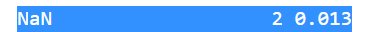

In [114]:
df["co2_emission"].isnull().sum()

2

In [115]:
df[df["co2_emission"].isnull()]

,make_model,short_description,body_type,price,km,prev_owner,Type,Previous Owners,inspection_new,Warranty,full_service,non_smoking_vehicle,body_color,paint_type,number_of_doors,number_of_seats,gearing_type,Cylinders,drive_chain,Fuel,co2_emission,emission_class,comfort_convenience,entertainment_media,Extras,safety_security,description,emission_label,Gears,age,hp_kw,Type_,upholstery_type,upholstery_color,displacement_cc,weight_kg,Consumption_comb,Consumption_city,Consumption_country,insp_new
2614,Audi A2,"30 TDI Navi, Lane assist, Sitzheizung, Einpark...",Off-Road,28200.000,26166.000,1.000,"Employee's car,,Diesel (Particulate Filter)",1,NaN,4 (Green),NaN,NaN,Grey,Metallic,5.000,5.000,Manual,4.000,front,Diesel,NaN,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Adaptive Cruise Control,Central door lock,...","Technik & Sicherheit:,7-Gang-Automatikgetriebe...",4 (Green),NaN,1.000,85.000,Employee's car,Cloth,Black,1598.000,NaN,4.900,4.500,4.500,Yes
13397,Renault Clio,zoé life,Sedans,8490.000,23863.000,NaN,"Used,,Electric",NaN,NaN,NaN,NaN,NaN,White,Metallic,5.000,5.000,Automatic,4.000,front,Hybride,NaN,NaN,"Air conditioning,Cruise control,Navigation system",On-board computer,NaN,Driver-side airbag,Très bon état général. Véhicule garantie pour ...,NaN,NaN,3.000,NaN,Used,NaN,Black,1461.000,NaN,NaN,NaN,NaN,No


In [116]:
df.co2_emission.fillna(method="ffill",inplace=True)

In [117]:
df["co2_emission"].isnull().sum()

0

### emission_class

In [118]:
summary(df,"emission_class")

              emission_class   oran
Euro 6                 10139 63.691
NaN                     3628 22.790
Euro 6d-TEMP            1845 11.590
Euro 6c                  127  0.798
Euro 5                    78  0.490
Euro 6d                   62  0.389
Euro 4                    40  0.251
########################################


In [119]:
df.groupby(["make_model", "age", "Fuel", "emission_class"]).price.describe()

count      mean       std  \
make_model     age   Fuel    emission_class                               
Audi A1        0.000 Benzine Euro 6         265.000 24405.623  3210.147   
                             Euro 6d          5.000 21510.000   356.371   
                             Euro 6d-TEMP   260.000 23659.588  3612.979   
                     Diesel  Euro 6           4.000 19370.000  1181.891   
               1.000 Benzine Euro 5           3.000 17862.667  1840.593   
                             Euro 6         323.000 18612.545  2637.438   
                             Euro 6d-TEMP    11.000 24093.636  3274.863   
                     Diesel  Euro 5           1.000 16800.000       NaN   
                             Euro 6         295.000 17755.217  2063.238   
               2.000 Benzine Euro 5           1.000 10999.000       NaN   
                             Euro 6         213.000 16718.394  2172.885   
                     Diesel  Euro 6         132.000 16343.379  1851.918   
               3.000 Benzine Euro 4           1.000 12990.000       NaN   
                             Euro 6         258.000 14505.132  2025.506   
                             Euro 6d-TEMP     7.000 16064.429  2271.948   
                     Diesel  Euro 5           4.000 14210.000  1478.310   
                             Euro 6         269.000 14424.617  1705.459   
                             Euro 6c          2.000 14045.000   219.203   
Audi A2        1.000 Diesel  Euro 6           1.000 28200.000       NaN   
Audi A3        0.000 Benzine Euro 6         162.000 24778.685  3406.428   
                             Euro 6d-TEMP   211.000 24440.910  3315.706   
                     Diesel  Euro 6         100.000 25007.780  1895.321   
                             Euro 6c          1.000 20000.000       NaN   
                             Euro 6d          2.000 24195.000   997.021   
                             Euro 6d-TEMP    76.000 25179.711  2086.357   
                     LPG/CNG Euro 6           1.000 34738.000       NaN   
                             Euro 6d-TEMP     3.000 30233.333  3455.913   
               1.000 Benzine Euro 6         121.000 26038.876 11423.210   
                             Euro 6d-TEMP    23.000 22442.696  3319.700   
                     Diesel  Euro 5           1.000 20500.000       NaN   
                             Euro 6         596.000 21863.597  2166.183   
                             Euro 6d          1.000 20500.000       NaN   
                             Euro 6d-TEMP    16.000 24461.875  2402.316   
                     Hybride Euro 6           3.000 37449.667  1361.635   
                     LPG/CNG Euro 6           2.000 26600.000   424.264   
                             Euro 6d-TEMP     1.000 26890.000       NaN   
               2.000 Benzine Euro 6         125.000 20985.752  6870.602   
                     Diesel  Euro 6         461.000 19846.093  3036.719   
                             Euro 6d          1.000 18950.000       NaN   
                     LPG/CNG Euro 6           6.000 22566.667  2001.666   
               3.000 Benzine Euro 5           1.000 14550.000       NaN   
                             Euro 6          99.000 16457.121  4422.135   
                     Diesel  Euro 5           5.000 16698.000  2111.521   
                             Euro 6         579.000 16539.174  2583.629   
                             Euro 6c          2.000 17975.000   742.462   
                     Hybride Euro 6           1.000 24950.000       NaN   
                     LPG/CNG Euro 6          16.000 18749.938  2688.004   
Opel Astra     0.000 Benzine Euro 5           1.000 17600.000       NaN   
                             Euro 6         113.000 21042.602  5282.796   
                             Euro 6c          2.000 21584.000   353.553   
                             Euro 6d          6.000 19190.000  2791.415   
                             Euro 6d-TEMP   210.000 22714.524  5091.286

In [120]:
df.drop("emission_class", axis=1, inplace=True)

### comfort_convenience

In [121]:
summary(df,"comfort_convenience")

                                                    comfort_convenience  oran
NaN                                                                 920 5.779
Air conditioning,Electrical side mirrors,Hill H...                  216 1.357
Air conditioning,Electrical side mirrors,Power ...                  134 0.842
Air conditioning,Power windows                                      130 0.817
Air conditioning,Armrest,Automatic climate cont...                  105 0.660
...                                                                 ...   ...
Air conditioning,Cruise control,Electrical side...                    1 0.006
Air conditioning,Armrest,Automatic climate cont...                    1 0.006
Air conditioning,Armrest,Cruise control,Electri...                    1 0.006
Air conditioning,Automatic climate control,Crui...                    1 0.006
Air conditioning,Automatic climate control,Crui...                    1 0.006

[6199 rows x 2 columns]
#######################################

In [122]:
def get_diff_category_column(Series:pd.Series, exclude=''',/\n''', pattern=r'''[,\n]| /''', strip='''\n' "!?|.,*+-_/][\\n''', diff_value=list()):  
    diff_value.clear()
    column = Series.dropna().apply(str).str.strip(strip)
    for row in column:
        if not any(x in exclude for x in row) and row not in diff_value:
            diff_value.append(row)
        else:
            for data in map(lambda x: x.strip(strip), filter(None, re.split(pattern, row))):
                if data not in diff_value:
                    diff_value.append(data)
    return dict(enumerate(sorted(diff_value)))

In [123]:
get_diff_category_column(df["comfort_convenience"])

{0: 'Air conditioning',
 1: 'Air suspensio',
 2: 'Armrest',
 3: 'Automatic climate control',
 4: 'Auxiliary heating',
 5: 'Cruise control',
 6: 'Electric Starter',
 7: 'Electric tailgate',
 8: 'Electrical side mirrors',
 9: 'Electrically adjustable seats',
 10: 'Electrically heated windshield',
 11: 'Heads-up display',
 12: 'Heated steering wheel',
 13: 'Hill Holder',
 14: 'Keyless central door lock',
 15: 'Leather seats',
 16: 'Leather steering wheel',
 17: 'Light sensor',
 18: 'Lumbar support',
 19: 'Massage seats',
 20: 'Multi-function steering wheel',
 21: 'Navigation system',
 22: 'Panorama roof',
 23: 'Park Distance Control',
 24: 'Parking assist system camera',
 25: 'Parking assist system self-steering',
 26: 'Parking assist system sensors front',
 27: 'Parking assist system sensors rear',
 28: 'Power windows',
 29: 'Rain sensor',
 30: 'Seat heating',
 31: 'Seat ventilatio',
 32: 'Split rear seats',
 33: 'Start-stop system',
 34: 'Sunroof',
 35: 'Tinted windows',
 36: 'Wind defl

In [124]:
df["comfort_convenience"] = df.groupby(["make_model","body_type", "age"]).comfort_convenience.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.comfort_convenience.mode()[0]))


In [125]:
summary(df,"comfort_convenience")

                                                    comfort_convenience  oran
Air conditioning,Electrical side mirrors,Hill H...                  288 1.809
Air conditioning,Electrical side mirrors,Power ...                  166 1.043
Air conditioning,Power windows                                      130 0.817
Air conditioning,Cruise control,Electrical side...                  129 0.810
Air conditioning,Armrest,Automatic climate cont...                  120 0.754
...                                                                 ...   ...
Air conditioning,Cruise control,Electrical side...                    1 0.006
Air conditioning,Armrest,Cruise control,Electri...                    1 0.006
Air conditioning,Armrest,Cruise control,Hill Ho...                    1 0.006
Air conditioning,Armrest,Automatic climate cont...                    1 0.006
Air conditioning,Automatic climate control,Crui...                    1 0.006

[6198 rows x 2 columns]
#######################################

In [126]:
df["comfort_convenience"] = [",".join(item) if type(item) == list else item for item in df["comfort_convenience"]]

In [127]:
summary(df,"comfort_convenience")

                                                    comfort_convenience  oran
Air conditioning,Electrical side mirrors,Hill H...                  288 1.809
Air conditioning,Electrical side mirrors,Power ...                  166 1.043
Air conditioning,Power windows                                      130 0.817
Air conditioning,Cruise control,Electrical side...                  129 0.810
Air conditioning,Armrest,Automatic climate cont...                  120 0.754
...                                                                 ...   ...
Air conditioning,Cruise control,Electrical side...                    1 0.006
Air conditioning,Armrest,Cruise control,Electri...                    1 0.006
Air conditioning,Armrest,Cruise control,Hill Ho...                    1 0.006
Air conditioning,Armrest,Automatic climate cont...                    1 0.006
Air conditioning,Automatic climate control,Crui...                    1 0.006

[6198 rows x 2 columns]
#######################################

### entertainment_media

In [128]:
df["entertainment_media"] = [",".join(item) if type(item) == list else item for item in df["entertainment_media"]]

In [129]:
summary(df,"entertainment_media")

                                                    entertainment_media  oran
NaN                                                                1374 8.631
Bluetooth,Hands-free equipment,On-board compute...                 1282 8.053
Bluetooth,Hands-free equipment,MP3,On-board com...                  982 6.169
Bluetooth,CD player,Hands-free equipment,MP3,On...                  783 4.919
On-board computer,Radio                                             487 3.059
Radio                                                               477 2.996
Bluetooth,CD player,Hands-free equipment,On-boa...                  465 2.921
On-board computer                                                   461 2.896
Bluetooth,CD player,Hands-free equipment,MP3,On...                  404 2.538
Bluetooth,On-board computer,Radio                                   397 2.494
Bluetooth,Hands-free equipment,On-board compute...                  378 2.375
Bluetooth,CD player,Hands-free equipment,MP3,On...              

In [130]:
get_diff_category_column(df["entertainment_media"])

{0: 'Bluetooth',
 1: 'CD player',
 2: 'Digital radio',
 3: 'Hands-free equipment',
 4: 'MP3',
 5: 'On-board computer',
 6: 'Radio',
 7: 'Sound system',
 8: 'Televisio',
 9: 'USB'}

In [131]:
df.groupby(["make_model","body_type", "age"]).entertainment_media.describe().T

make_model                                            Audi A1  \
body_type                                             Compact   
age                                                     0.000   
count                                                     340   
unique                                                     75   
top         Bluetooth,CD player,Hands-free equipment,MP3,O...   
freq                                                       49   

make_model                                                     \
body_type                                                       
age                                                     1.000   
count                                                     259   
unique                                                     51   
top         Bluetooth,CD player,Hands-free equipment,MP3,O...   
freq                                                       43   

make_model                                                     \
body_type                                                       
age                                                     2.000   
count                                                     156   
unique                                                     42   
top         Bluetooth,CD player,Hands-free equipment,On-bo...   
freq                                                       32   

make_model                                                     \
body_type                                                       
age                                                     3.000   
count                                                     227   
unique                                                     52   
top         Bluetooth,CD player,Hands-free equipment,On-bo...   
freq                                                       31   

make_model                                                     \
body_type                                               Coupe   
age                                                     2.000   
count                                                       1   
unique                                                      1   
top         CD player,Hands-free equipment,MP3,On-board co...   
freq                                                        1   

make_model                                                            \
body_type                                                     Sedans   
age                                                     3.000  0.000   
count                                                       1    398   
unique                                                      1     78   
top         Bluetooth,CD player,Hands-free equipment,On-bo...  Radio   
freq                                                        1     55   

make_model                                                            \
body_type                                                              
age                                                     1.000  2.000   
count                                                     447    244   
unique                                                     78     62   
top         Bluetooth,CD player,Hands-free equipment,MP3,O...  Radio   
freq                                                       63     27   

make_model                                                     \
body_type                                                       
age                                                     3.000   
count                                                     381   
unique                                                     77   
top         Bluetooth,CD player,Hands-free equipment,MP3,O...   
freq                                                       35   

make_model                                  \
body_type                    Station wagon   
age                                  0.000   
count                                    2   
unique                                   2   
top         On-board com

In [132]:
df["entertainment_media"] = df.groupby(["make_model","body_type", "age"]).entertainment_media.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.entertainment_media.mode()[0]))

In [133]:
summary(df,"entertainment_media")

                                                    entertainment_media  oran
Bluetooth,Hands-free equipment,On-board compute...                 1549 9.731
Bluetooth,Hands-free equipment,MP3,On-board com...                 1106 6.948
Bluetooth,CD player,Hands-free equipment,MP3,On...                  923 5.798
On-board computer,Radio                                             561 3.524
Radio                                                               544 3.417
On-board computer                                                   542 3.405
Bluetooth,CD player,Hands-free equipment,On-boa...                  531 3.336
Bluetooth,CD player,Hands-free equipment,MP3,On...                  423 2.657
Bluetooth,On-board computer,Radio                                   412 2.588
Bluetooth,Hands-free equipment,On-board compute...                  407 2.557
Bluetooth,CD player,Hands-free equipment,MP3,On...                  349 2.192
Bluetooth,Digital radio,Hands-free equipment,On...              

### Extras

In [134]:
df["Extras"] = [",".join(item) if type(item) == list else item for item in df["Extras"]]

In [135]:
summary(df,"Extras")

                                                    Extras   oran
Alloy wheels                                          3245 20.384
NaN                                                   2962 18.607
Alloy wheels,Touch screen                              697  4.378
Alloy wheels,Voice Control                             577  3.625
Alloy wheels,Touch screen,Voice Control                541  3.398
...                                                    ...    ...
Alloy wheels,Catalytic Converter,Shift paddles,...       1  0.006
Alloy wheels,Catalytic Converter,Roof rack,Spor...       1  0.006
Alloy wheels,Catalytic Converter,Ski bag,Sport ...       1  0.006
Catalytic Converter,Roof rack,Sport seats,Sport...       1  0.006
Alloy wheels,Shift paddles,Ski bag,Sport seats,...       1  0.006

[660 rows x 2 columns]
########################################


In [136]:
df.groupby(["make_model","body_type"]).Extras.describe().T

make_model       Audi A1                                                  \
body_type        Compact                             Coupe        Sedans   
count                929                                 2          1378   
unique                96                                 2           146   
top         Alloy wheels  Alloy wheels,Catalytic Converter  Alloy wheels   
freq                 185                                 1           429   

make_model                                      Audi A2       Audi A3  \
body_type              Station wagon  Van      Off-Road       Compact   
count                             19    0             1           157   
unique                            11    0             1            23   
top         Alloy wheels,Sport seats  NaN  Alloy wheels  Alloy wheels   
freq                               8  NaN             1            75   

make_model                                                           \
body_type                                 Convertible         Coupe   
count                                               8             4   
unique                                              7             2   
top         Alloy wheels,Sport seats,Sport suspension  Alloy wheels   
freq                                                2             3   

make_model                                Opel Astra                \
body_type         Sedans Station wagon       Compact         Coupe   
count               2443           255           102             2   
unique               241            75            18             2   
top         Alloy wheels  Alloy wheels  Alloy wheels  Alloy wheels   
freq                 873            64            61             1   

make_model                                                                   \
body_type                                            Off-Road        Sedans   
count                                                       1           856   
unique                                                      1           107   
top         Alloy wheels,Roof rack,Sport seats,Touch scree...  Alloy wheels   
freq                                                        1           166   

make_model                  Opel Corsa                                       \
body_type  Station wagon       Compact         Coupe Off-Road        Sedans   
count               1104           856             9        0           586   
unique               124            57             5        0            72   
top            Roof rack  Alloy wheels  Alloy wheels      NaN  Alloy wheels   
freq                 146           182             5      NaN           189   

make_model                                        Opel Insignia        \
body_type                        Transporter  Van       Compact Coupe   
count                                      3    0            16     0   
unique                                     3    0             7     0   
top         Alloy wheels,Catalytic Converter  NaN  Alloy wheels   NaN   
freq                                       1  NaN             6   NaN   

make_model                                                                   \
body_type                                            Off-Road        Sedans   
count                                                       3           737   
unique                                                      3           114   
top         Alloy wheels,Roof rack,Ski bag,Sport package,S...  Alloy wheels   
freq                                                        1           217   

make_model                                                 Renault Clio  \
body_type            Station wagon                    Van       Compact   
count                         1518                      1           255   
unique                         238                      1            38   
top         Alloy wheels,Roof rack  Roof rack,Sport seats  Alloy wheels   
freq             

In [137]:
df["Extras"] = df.groupby(["make_model","body_type"]).Extras.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.Extras.mode()[0]))


### safety_security      

In [138]:
df["safety_security"]

0        ABS,Central door lock,Daytime running lights,D...
1        ABS,Central door lock,Central door lock with r...
2        ABS,Central door lock,Daytime running lights,D...
3        ABS,Alarm system,Central door lock with remote...
4        ABS,Central door lock,Driver-side airbag,Elect...
                               ...                        
15914    ABS,Central door lock,Central door lock with r...
15915    ABS,Adaptive Cruise Control,Blind spot monitor...
15916    ABS,Adaptive Cruise Control,Blind spot monitor...
15917    ABS,Blind spot monitor,Driver-side airbag,Elec...
15918    ABS,Blind spot monitor,Daytime running lights,...
Name: safety_security, Length: 15919, dtype: object

In [139]:
summary(df,"safety_security")

                                                    safety_security  oran
NaN                                                             982 6.169
ABS,Central door lock,Daytime running lights,Dr...              538 3.380
ABS,Central door lock,Daytime running lights,Dr...              480 3.015
ABS,Central door lock,Daytime running lights,Dr...              275 1.727
ABS,Central door lock,Daytime running lights,Dr...              272 1.709
...                                                             ...   ...
ABS,Central door lock,Electronic stability cont...                1 0.006
ABS,Adaptive Cruise Control,Central door lock,D...                1 0.006
ABS,Adaptive Cruise Control,Alarm system,Centra...                1 0.006
ABS,Adaptive Cruise Control,Central door lock,D...                1 0.006
ABS,Adaptive Cruise Control,Central door lock,D...                1 0.006

[4444 rows x 2 columns]
########################################


In [140]:
df.groupby(["make_model","body_type", "age"]).safety_security.describe().T

make_model                                            Audi A1  \
body_type                                             Compact   
age                                                     0.000   
count                                                     342   
unique                                                    118   
top         ABS,Central door lock,Daytime running lights,D...   
freq                                                       30   

make_model                                                     \
body_type                                                       
age                                                     1.000   
count                                                     261   
unique                                                     77   
top         ABS,Central door lock,Daytime running lights,D...   
freq                                                       39   

make_model                                                     \
body_type                                                       
age                                                     2.000   
count                                                     157   
unique                                                     67   
top         ABS,Central door lock,Daytime running lights,D...   
freq                                                       29   

make_model                                                     \
body_type                                                       
age                                                     3.000   
count                                                     229   
unique                                                     83   
top         ABS,Central door lock,Daytime running lights,D...   
freq                                                       53   

make_model                                                     \
body_type                                               Coupe   
age                                                     2.000   
count                                                       1   
unique                                                      1   
top         ABS,Adaptive Cruise Control,Adaptive headlight...   
freq                                                        1   

make_model                                                     \
body_type                                                       
age                                                     3.000   
count                                                       1   
unique                                                      1   
top         ABS,Adaptive Cruise Control,Central door lock,...   
freq                                                        1   

make_model                                                     \
body_type                                              Sedans   
age                                                     0.000   
count                                                     405   
unique                                                    178   
top         ABS,Central door lock,Daytime running lights,E...   
freq                                                       33   

make_model                                                     \
body_type                                                       
age                                                     1.000   
count                                                     460   
unique                                                    158   
top         ABS,Central door lock,Daytime running lights,D...   
freq                                                       77   

make_model                                                     \
body_type                                                       
age                                                     2.000   
count                                                     250   
unique                                                    132   
top         ABS,Central doo

In [141]:
df["safety_security"] = df.groupby(["make_model","body_type", "age"]).safety_security.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.safety_security.mode()[0]))

In [142]:
summary(df,"safety_security")

                                                    safety_security  oran
ABS,Central door lock,Daytime running lights,Dr...              661 4.152
ABS,Central door lock,Daytime running lights,Dr...              639 4.014
ABS,Central door lock,Daytime running lights,Dr...              322 2.023
ABS,Central door lock,Daytime running lights,Dr...              295 1.853
ABS,Central door lock,Daytime running lights,Dr...              280 1.759
...                                                             ...   ...
ABS,Adaptive headlights,Central door lock,Dayti...                1 0.006
ABS,Alarm system,Central door lock,Daytime runn...                1 0.006
ABS,Central door lock,Central door lock with re...                1 0.006
ABS,Central door lock,Central door lock with re...                1 0.006
ABS,Adaptive Cruise Control,Central door lock,D...                1 0.006

[4443 rows x 2 columns]
########################################


### emission_label       

In [143]:
summary(df,"emission_label")

                emission_label   oran
NaN                      11974 75.218
4 (Green)                 3553 22.319
1 (No sticker)             381  2.393
5 (Blue)                     8  0.050
3 (Yellow)                   2  0.013
2 (Red)                      1  0.006
########################################


In [144]:
missing_vs_target(df,"price",["emission_label"])

                        TARGET_MEAN  Count
emission_label_NA_FLAG                    
0                         18961.054   3945
1                         17709.819  11974




In [145]:
df.drop(columns="emission_label", inplace=True)

In [146]:
df.shape

(15919, 38)

### Gears

In [147]:
df["Gears"]

0         NaN
1       7.000
2         NaN
3       6.000
4         NaN
         ... 
15914   6.000
15915   7.000
15916   6.000
15917   6.000
15918     NaN
Name: Gears, Length: 15919, dtype: float64

In [148]:
summary(df,"Gears")

        Gears   oran
6.000    5822 36.573
NaN      4712 29.600
5.000    3239 20.347
7.000    1908 11.986
8.000     224  1.407
9.000       6  0.038
1.000       2  0.013
3.000       2  0.013
4.000       2  0.013
2.000       1  0.006
50.000      1  0.006
########################################


In [149]:
df.loc[(df["make_model"] == "Opel Corsa")  & (df["body_type"] == "Sedans"),"Gears"].value_counts()

5.000    588
6.000    167
2.000      1
Name: Gears, dtype: int64

In [150]:
summary(df,"Gears")

        Gears   oran
6.000    5822 36.573
NaN      4712 29.600
5.000    3239 20.347
7.000    1908 11.986
8.000     224  1.407
9.000       6  0.038
1.000       2  0.013
3.000       2  0.013
4.000       2  0.013
2.000       1  0.006
50.000      1  0.006
########################################


In [151]:
df["Gears"] = df.groupby(["make_model","body_type"]).Gears.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.Gears.mode()[0]))


In [152]:
summary(df,"Gears")

        Gears   oran
6.000    8414 52.855
5.000    5359 33.664
7.000    1908 11.986
8.000     224  1.407
9.000       6  0.038
1.000       2  0.013
3.000       2  0.013
4.000       2  0.013
2.000       1  0.006
50.000      1  0.006
########################################


### hp_kw

In [153]:
summary(df,"hp_kw")

         hp_kw   oran
85.000    2542 15.968
66.000    2122 13.330
81.000    1402  8.807
100.000   1308  8.217
110.000   1112  6.985
70.000     888  5.578
125.000    707  4.441
51.000     695  4.366
55.000     569  3.574
118.000    516  3.241
92.000     466  2.927
121.000    392  2.462
147.000    380  2.387
77.000     345  2.167
56.000     286  1.797
54.000     276  1.734
103.000    253  1.589
87.000     232  1.457
165.000    194  1.219
88.000     177  1.112
60.000     160  1.005
162.000     98  0.616
NaN         88  0.553
74.000      81  0.509
96.000      72  0.452
71.000      59  0.371
101.000     47  0.295
67.000      40  0.251
154.000     39  0.245
122.000     35  0.220
119.000     30  0.188
164.000     27  0.170
135.000     24  0.151
82.000      22  0.138
52.000      22  0.138
78.000      20  0.126
1.000       20  0.126
294.000     18  0.113
146.000     18  0.113
141.000     16  0.101
57.000      10  0.063
104.000      8  0.050
120.000      8  0.050
191.000      7  0.044
112.000   

In [154]:
df["hp_kw"] = df.groupby(["make_model", "displacement_cc", "Cylinders", "Fuel"]).hp_kw.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.hp_kw.mode()[0]))

In [155]:
df["hp_kw"].isnull().sum()

0

### upholstery_type

In [156]:
summary(df,"upholstery_type")

              upholstery_type   oran
Cloth                    8423 52.912
NaN                      4871 30.599
Part leather             1499  9.416
Full leather             1009  6.338
Velour                     60  0.377
alcantara                  57  0.358
########################################


In [157]:
df["upholstery_type"] = df.groupby(["make_model", "body_type"]).upholstery_type.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.upholstery_type.mode()[0]))

In [158]:
summary(df,"upholstery_type")

              upholstery_type   oran
Cloth                   12889 80.966
Part leather             1508  9.473
Full leather             1405  8.826
Velour                     60  0.377
alcantara                  57  0.358
########################################


### upholstery_color 

In [159]:
summary(df,"upholstery_color")

        upholstery_color   oran
Black               8201 51.517
NaN                 5022 31.547
Grey                1376  8.644
Other               1016  6.382
Brown                207  1.300
Beige                 54  0.339
Blue                  16  0.101
White                 13  0.082
Red                    9  0.057
Yellow                 4  0.025
Orange                 1  0.006
########################################


In [160]:
df["upholstery_color"] = df.groupby(["make_model", "body_type"]).upholstery_color.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.upholstery_color.mode()[0]))

In [161]:
summary(df,"upholstery_color")

        upholstery_color   oran
Black              13115 82.386
Grey                1442  9.058
Other               1017  6.389
Brown                248  1.558
Beige                 54  0.339
Blue                  16  0.101
White                 13  0.082
Red                    9  0.057
Yellow                 4  0.025
Orange                 1  0.006
########################################


### weight_kg

In [162]:
summary(df,"weight_kg")

          weight_kg   oran
NaN            6974 43.809
1163.000        574  3.606
1360.000        356  2.236
1165.000        301  1.891
1335.000        242  1.520
1135.000        213  1.338
1199.000        205  1.288
1734.000        170  1.068
1180.000        168  1.055
1503.000        165  1.036
1350.000        155  0.974
1355.000        135  0.848
1260.000        127  0.798
1275.000        112  0.704
1278.000        110  0.691
1487.000        109  0.685
1425.000        109  0.685
1255.000        108  0.678
1200.000        107  0.672
1522.000        103  0.647
1273.000        103  0.647
1280.000        102  0.641
1403.000         91  0.572
1120.000         90  0.565
1659.000         89  0.559
1195.000         89  0.559
1701.000         87  0.547
1250.000         84  0.528
1441.000         82  0.515
1308.000         80  0.503
1285.000         80  0.503
1613.000         75  0.471
1110.000         75  0.471
1279.000         72  0.452
1364.000         70  0.440
1345.000         67  0.421
1

In [163]:
missing_vs_target(df,"price",["weight_kg"])

                   TARGET_MEAN  Count
weight_kg_NA_FLAG                    
0                    18096.314   8945
1                    17921.882   6974




In [164]:
df.drop("weight_kg",axis=1,inplace=True)

### km

In [165]:
summary(df,"km")

             km  oran
10.000     1045 6.564
NaN        1024 6.433
1.000       367 2.305
5.000       170 1.068
50.000      148 0.930
...         ...   ...
67469.000     1 0.006
43197.000     1 0.006
10027.000     1 0.006
35882.000     1 0.006
57.000        1 0.006

[6690 rows x 2 columns]
########################################


In [166]:
df['km'].isnull().sum()

1024

In [167]:
df['age'].isnull().sum()

0

In [168]:
df['km']=df['km'].fillna(df.groupby(['body_type','age'])['km'].transform(lambda x : x.mean()))

In [169]:
df['km'].isnull().sum()

0

### Consumption_comb

In [170]:
summary(df,"Consumption_comb")

        Consumption_comb   oran
NaN                 2033 12.771
5.400                770  4.837
3.900                733  4.605
4.000                713  4.479
5.100                657  4.127
4.400                623  3.914
5.600                618  3.882
4.700                602  3.782
3.800                585  3.675
4.800                546  3.430
5.000                545  3.424
4.500                523  3.285
5.200                454  2.852
4.200                435  2.733
4.600                426  2.676
4.900                393  2.469
5.500                380  2.387
5.300                380  2.387
3.700                369  2.318
5.900                369  2.318
4.100                342  2.148
5.700                342  2.148
6.000                331  2.079
4.300                307  1.929
3.300                307  1.929
3.500                288  1.809
6.200                216  1.357
3.600                194  1.219
6.300                181  1.137
6.100                175  1.099
5.800   

In [171]:
df['Consumption_comb']=df['Consumption_comb'].fillna(df.groupby(['make_model', 'body_type'])['Consumption_comb'].transform('median'))

In [172]:
summary(df,"Consumption_comb")

        Consumption_comb  oran
5.600                983 6.175
5.400                897 5.635
4.000                768 4.824
5.000                764 4.799
4.700                763 4.793
3.900                733 4.605
4.500                731 4.592
4.400                666 4.184
4.100                665 4.177
5.100                657 4.127
3.800                585 3.675
4.200                575 3.612
4.800                546 3.430
4.900                535 3.361
5.300                530 3.329
5.200                512 3.216
4.600                426 2.676
5.500                388 2.437
3.700                369 2.318
5.900                369 2.318
5.700                342 2.148
6.000                331 2.079
4.300                307 1.929
3.300                307 1.929
3.500                288 1.809
6.200                219 1.376
3.600                194 1.219
6.300                181 1.137
6.100                175 1.099
5.800                164 1.030
6.600                148 0.930
6.800   

In [173]:
df['Consumption_comb']=df['Consumption_comb'].fillna(df.groupby(['body_type'])['Consumption_comb'].transform('median'))

In [174]:
df['Consumption_comb'].isnull().sum()

0

### Consumption_city

In [175]:
summary(df,"Consumption_city")

        Consumption_city   oran
NaN                 2376 14.926
4.200               1178  7.400
3.700               1089  6.841
4.400                898  5.641
4.500                848  5.327
3.800                802  5.038
3.900                777  4.881
4.700                615  3.863
4.100                592  3.719
4.000                589  3.700
3.500                525  3.298
4.300                520  3.267
4.600                516  3.241
3.600                486  3.053
4.900                481  3.022
3.100                481  3.022
3.300                457  2.871
3.400                353  2.217
4.800                341  2.142
5.300                278  1.746
5.400                239  1.501
5.100                232  1.457
5.700                204  1.281
3.200                180  1.131
5.600                154  0.967
3.000                142  0.892
5.000                130  0.817
5.200                117  0.735
6.300                 52  0.327
6.000                 42  0.264
5.500   

In [176]:
df['Consumption_city']=df['Consumption_city'].fillna(df.groupby(['make_model', 'body_type'])['Consumption_city'].transform('median'))

In [177]:
df['Consumption_city'].isnull().sum()

9

In [178]:
df['Consumption_city']=df['Consumption_city'].fillna(df.groupby(['body_type'])['Consumption_city'].transform('median'))

In [179]:
df['Consumption_city'].isnull().sum()

0

### Consumption_country

In [180]:
summary(df,"Consumption_country")

        Consumption_country   oran
NaN                    2376 14.926
4.200                  1178  7.400
3.700                  1089  6.841
4.400                   898  5.641
4.500                   848  5.327
3.800                   802  5.038
3.900                   777  4.881
4.700                   615  3.863
4.100                   592  3.719
4.000                   589  3.700
3.500                   525  3.298
4.300                   520  3.267
4.600                   516  3.241
3.600                   486  3.053
4.900                   481  3.022
3.100                   481  3.022
3.300                   457  2.871
3.400                   353  2.217
4.800                   341  2.142
5.300                   278  1.746
5.400                   239  1.501
5.100                   232  1.457
5.700                   204  1.281
3.200                   180  1.131
5.600                   154  0.967
3.000                   142  0.892
5.000                   130  0.817
5.200               

In [181]:
df['Consumption_country']=df['Consumption_country'].fillna(df.groupby(['make_model', 'body_type'])['Consumption_country'].transform('median'))

In [182]:
df['Consumption_country'].isnull().sum()

9

In [183]:
df['Consumption_country']=df['Consumption_country'].fillna(df.groupby(['body_type'])['Consumption_country'].transform('median'))

In [184]:
df['Consumption_country'].isnull().sum()

0

### prev_owner

In [185]:
summary(df,"prev_owner")

       prev_owner   oran
1.000        8294 52.101
NaN          6828 42.892
2.000         778  4.887
3.000          17  0.107
4.000           2  0.013
########################################


In [186]:
df.loc[df['Type_']=='New','prev_owner']=df.loc[df['Type']=='New','prev_owner'].replace(np.nan,0)

In [187]:
df.loc[(df['age']==0)&(df['km']<5000),'prev_owner']=df.loc[(df['age']==0)&(df['km']<5000),'prev_owner'].replace(np.nan,1)

In [188]:
df['prev_owner']=df['prev_owner'].fillna(df.groupby(['age'])['prev_owner'].transform(lambda x : x.mode()[0]))

In [189]:
summary(df,"prev_owner")

       prev_owner   oran
1.000       15122 94.993
2.000         778  4.887
3.000          17  0.107
4.000           2  0.013
########################################


In [190]:
df.isnull().sum()

make_model                 0
short_description         46
body_type                  0
price                      0
km                         0
prev_owner                 0
Type                       2
Previous Owners         6640
inspection_new         11987
Warranty                6763
full_service            9689
non_smoking_vehicle    12459
body_color                 0
paint_type                 0
number_of_doors            0
number_of_seats            0
gearing_type               0
Cylinders                  0
drive_chain                0
Fuel                       0
co2_emission               0
comfort_convenience        0
entertainment_media        0
Extras                     0
safety_security            0
description              668
Gears                      0
age                        0
hp_kw                      0
Type_                      0
upholstery_type            0
upholstery_color           0
displacement_cc            0
Consumption_comb           0
Consumption_ci

In [191]:
df.drop("short_description",axis=1,inplace=True)

In [192]:
df.drop("Previous Owners",axis=1,inplace=True)

In [193]:
df.drop("inspection_new",axis=1,inplace=True)

In [194]:
df.drop("Warranty",axis=1,inplace=True)

In [195]:
df.drop("description",axis=1,inplace=True)

In [196]:
df.drop("non_smoking_vehicle",axis=1,inplace=True)

In [197]:
df.drop("full_service",axis=1,inplace=True)

In [198]:
df.drop("Type",axis=1,inplace=True)

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   body_type            15919 non-null  object 
 2   price                15919 non-null  float64
 3   km                   15919 non-null  float64
 4   prev_owner           15919 non-null  float64
 5   body_color           15919 non-null  object 
 6   paint_type           15919 non-null  object 
 7   number_of_doors      15919 non-null  float64
 8   number_of_seats      15919 non-null  float64
 9   gearing_type         15919 non-null  object 
 10  Cylinders            15919 non-null  float64
 11  drive_chain          15919 non-null  object 
 12  Fuel                 15919 non-null  object 
 13  co2_emission         15919 non-null  float64
 14  comfort_convenience  15919 non-null  object 
 15  entertainment_media  15919 non-null 

In [200]:
df.isnull().sum()

make_model             0
body_type              0
price                  0
km                     0
prev_owner             0
body_color             0
paint_type             0
number_of_doors        0
number_of_seats        0
gearing_type           0
Cylinders              0
drive_chain            0
Fuel                   0
co2_emission           0
comfort_convenience    0
entertainment_media    0
Extras                 0
safety_security        0
Gears                  0
age                    0
hp_kw                  0
Type_                  0
upholstery_type        0
upholstery_color       0
displacement_cc        0
Consumption_comb       0
Consumption_city       0
Consumption_country    0
insp_new               0
dtype: int64

In [201]:
df["body_type"].value_counts(dropna=False)

Sedans           8005
Station wagon    3678
Compact          3242
Van               817
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [203]:
df.to_csv("filled_scout.csv", index=False)